# Trabajo Práctico 1 - Análisis Exploratorio


##### Grupo 36 - Integrantes: Nilda, José y Florencia
---

## 1. Introducción

Jammp es una compañia que hace RBT ... en relacion a la venta de publicidad de telefonos. 
Contar brevemente de que va el trabajo y cada uno de los datasets que aquí esta.

## 2. Análisis Exploratorio
### 2.1 Dataset Auctions

In [7]:
import pandas as pd

Cada observación o fila del dataset de Auctions presenta una subasta, seleccionada de la base de datos de Jammp entre la fecha xxxx y xxxxx para Uruguay. Es por ello que la columna XXX solo presenta un único valor correspondiente al código de dicho país.

In [38]:
# Leo los archivos con Pandas
auctions = pd.read_csv('E:/Materias/Organizacion_datos_2019/auctions.csv.gzip', 
                       compression = 'gzip',
                       low_memory = False ,
                       dtype = {'country' : 'category' ,'device_id' : 'category', 
                               'platform':'category', 'ref_type_id':'category',
                               'source_id':'category'})
#Explicito el formato de la fecha
auctions['created'] = pd.to_datetime(auctions['created'], format='%Y-%m-%d %H')
#Tengo una primera visión del DataFrame
auctions.head()

La cantidad de devices es XXX sospechamos xxx

In [ ]:
#numero de devices

Se pudo observar que las subastas registradas se realizaron primariamente mediante la plataforma xxx


In [ ]:
# Aqui grafico sobre esto

### 2.2 Dataset Clicks

Cada columna del dataset clicks representa una click realizado por el usuario en la impresión de una publicidad.

In [6]:
# Leo el dataset Clicks
clicks = pd.read_csv('D:/Desktop/Materias/Organizacion_datos_2019/clicks.csv.gzip',
                     compression = 'gzip')

#Explicito el formato de la fecha
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y-%m-%d %H')

#Visualizo
clicks.head()


,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


Observamos la estadistica descriptiva del dataset 

In [ ]:
clicks.describe()


In [ ]:
# Valores Nulos (Nilda)

Cuando analizamos los advertiser_id notamos que la mayoria de los clicks se corresponden con el advertiser 3. No eliminamos los otros datos pero de ahora mas consideramos que los resultados de este dataset son representativos de lo que ocurre con las publicidades de este advertiser

Se observa que la mayoría de los clicks se dio dentro del periodo apartir del día 03-08, existiendo un patron diferente durante el fin de semana que surante las semanas.
(chequear esto)

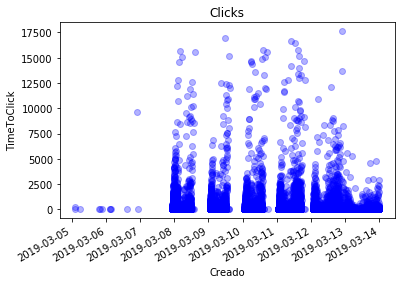

In [53]:
import matplotlib.pyplot as plt

plt.plot_date(clicks['created'], clicks['timeToClick'], fmt="bo", tz=None, xdate=True, alpha=0.3)
#plt.scatter(clicks['created'], alpha=0.5)
plt.gcf().autofmt_xdate() #etiquetas giradas
plt.title('Clicks')
plt.xlabel('Creado')
plt.ylabel('TimeToClick')
plt.show()

Si analizamos la figura X, por hora podemos ver que la mayoría de los clicks se realizo entre el 8 y el 14 de marzo. Al evaluar por hora son discriminar el día, como se observa en la tabla a continuación, la mayoría de los clicks se realizó entre las 10 pm y las 2pm, con excepción de a las 0 hs (!!!!)

In [164]:
#cantidad de eventos por horas
sub_clicks['horas'].value_counts()

1     2897
23    1937
2     1443
22    1019
11     961
12     796
10     791
4      785
5      644
16     629
15     607
13     593
14     551
3      534
9      523
6      458
18     435
17     435
21     368
8      361
7      354
19     285
20     283
0      262
Name: horas, dtype: int64

In [240]:
#cantidad de eventos por dia
sub_clicks['dia'].value_counts()

12    5204
11    4557
10    3966
13    3468
9     3283
8     2839
Name: dia, dtype: int64

Al momento de graficar la cantidad de puntos, eliminaremos los primeros 3 días ya que no aportan datos contundentes y no generan gráficos de densidad representativos. La figura siguiente muestra un grafico de densidad de clicks por hora para cada día.

C:\Users\FLORENCIA\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


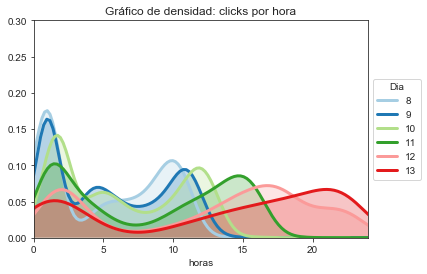

In [248]:
# Grafico analizando por hora
import pandas as pd
import datetime as dt
from matplotlib import pyplot
import seaborn as sns

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day
    
#remuevo los 3 primeros dias, contando a partir del dia 8
sub_clicks = clicks[clicks["dia"]>=8]

# grafico
fig, ax = plt.subplots(1,1)

# Ordeno los días antes del loop para que luego me queden en orden en la leyenda 
sub_dias = sorted(sub_clicks['dia'].unique())

# Itero filtrando por día y gráficando la densidad de clicks sobre el mismo eje
for s in sub_dias:
    data = sub_clicks[sub_clicks['dia'] == s]
    ax =  sns.distplot(data["horas"], hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 3}, label = s)

# Elijo paleta de colores
sns.color_palette(sns.set_palette("Paired"))

# modifico rangos de los ejes
ax.set(ylim=(0,0.3))
ax.set(xlim=(0,24))

# Saco leyenda de dentro del gráfico y agrego título
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Dia')

#titulo
plt.title('Gráfico de densidad: clicks por hora')

fig.show()


Cuando se analiza la zona dónde se realizaron estos clicks estos ocurrieron en la parte baja de la pantalla del teléfono. Como no sabemos el formato de la publicidad que uso Jammp no podemos saber si esto significa que la mayoría de los clicks se dieron en publicidades de forma rectangular que ese encontraban en la zona inferior o se puede atribuir a que había más publicidades en la zona baja que en cualquier otra. Datos nulos

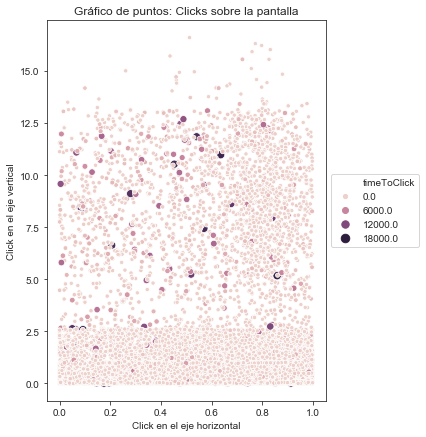

In [93]:
# Gráfico de puntos

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# estilo
sns.set_style("ticks")

# cambio el tamaño del gráfico
plt.gcf().set_size_inches(5, 7)

# Paleta de color

sns.scatterplot(x = "touchX",
                y = "touchY", 
                size = "timeToClick",
                hue = "timeToClick",
                alpha = 1,
                data = clicks)

# titulo
plt.title('Gráfico de puntos: Clicks sobre la pantalla')

# titulos del eje
plt.xlabel('Click en el eje horizontal')
plt.ylabel('Click en el eje vertical')

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



El tiempo desde la impresión de la publicida hasta el click, representado por los valores de la columna timeToClick, fueron en su mayoría bajos tal como se evidencia en el histograma, dónde son pocos frecuentes los valores que superan los XXX seg.

In [61]:
#Analizo describe
clicks.describe()[["timeToClick"]]

,timeToClick
count,22977.000000
mean,230.403309
std,976.849149
min,0.017000
25%,2.915000
50%,10.588000
75%,71.703000
max,17616.188000


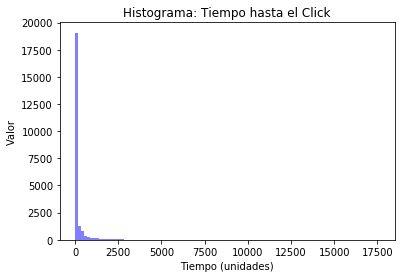

In [36]:
# Histograma de TimeToClicks

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 

num_bins = 100 #cada cuánto genera una división del histograma
n, bins, patches = plt.hist(clicks["timeToClick"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Histograma: Tiempo hasta el Click')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Valor')
plt.show()

El 75% de las veces evaluadas el tiempo hasta del click del usuario fue menor a 71 segundos

Es de allí que cuando observamos los valores de time to clicks en la pantalla del telefono los valores elevados de time to click se encuentran dispersos y son minoría como para poder sacar una conclusión al respecto.

### 2.3 Dataset Installs

El dataset Installs representa las instalaciones realizadas por los usuarios, ya sea atribuidas o no a las impresiones de publicidad de Jammp.


In [2]:
#Leo el archivo INSTALLS
import pandas as pd
from datetime import datetime

installs = pd.read_csv("D:/Desktop/Materias/Organizacion_datos_2019/installs.csv.gzip",
                       compression = 'gzip', dtype='object')

#Explicito el formato de la fecha
installs['created'] = installs['created'].astype('datetime64[ns]')

installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [5]:
# Descripción
installs.describe()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
count,3412,3412,3412,3412,0.0,3412,3412,3412,1047,3411,3364,1729,865,865,1729,6,3412,3378
unique,3412,31,2,3008,0.0,1,2,2,27,415,12,334,865,20,2,4,2717,30
top,2019-03-09 04:34:41.291000,7,1891515180541284343,3272750442824629569,NaN,False,False,6333597102633388268,3.083058605577787e+17,2.33194661091417e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,48332bf7-41fe-498f-8514-7bf8e80c8aa1,af_app_opened,true,{hash},1992632945768888579,3.3013777759776993e+18
freq,1,947,2080,4,NaN,3412,2547,1820,472,759,1729,393,1,428,1377,3,33,1484
first,2019-03-05 00:00:38.219000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:54:00.526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ni la columna "attributed", "implicit" presentan valores nulos. De allí que puedo calcular los porcentajes de los valores de cada columna usando el numero de filas como la cantidad total de valores. 

In [12]:
# veo si hay valores nulos
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [99]:
# Porcentaje de instalaciones atribuidas a jammp
#pd.to_numeric(installs["attributed"])
#installs[["attributed"]].count(False)

import numpy as np
installs.values().count("True")

sns.barplot(x='attributed', y='Values', data=installs, estimator=lambda x: sum(x==0)*100.0/len(x))

#atribuidos = installs["attributed"].astype(bool)

#sum(pd.to_numeric(atribuidos))

#sum(map(bool,installs["attributed"]))
#installs['Perc'] = (installs["attributed"]/ sum(pd.to_numeric(atribuidos))) *100

TypeError: 'numpy.ndarray' object is not callable

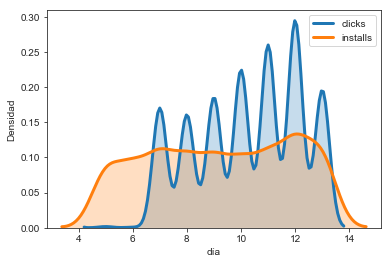

In [108]:
# Clicks versus Installs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

#genero una columna extrayendo las horas y otra con los días
installs['horas'] = installs['created'].dt.hour
installs['dia'] = installs['created'].dt.day

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day

#para click defini estas columnas antes
df = pd.DataFrame({'clicks': clicks["dia"], 'installs' : installs["dia"]})

#Grafico
fig, ax = plt.subplots(1, 1)

for columna in df.columns:
    ax =  sns.distplot(df[columna],
                       hist = False,
                       kde = True,
                       kde_kws = {'shade': True, 'linewidth': 3}, 
                       label = columna)

ax.set_xlabel("día")
ax.set_ylabel("Densidad")

plt.show()


In [186]:

#para click defini estas columnas antes
df_bar = pd.DataFrame({'clicks': n_clicks["dia"], 'installs' : n_installs["dia"]})





,dia,variable,value
0,5,clicks,31
1,6,clicks,14
2,7,clicks,2989
3,8,clicks,2839
4,9,clicks,3283
5,10,clicks,3966
6,11,clicks,4557
7,12,clicks,5204
8,13,clicks,3468
9,5,installs,337


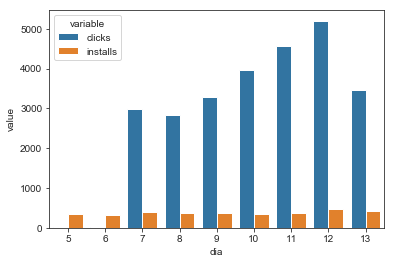

In [187]:
# grafico como barras
n_clicks = clicks.groupby("dia").agg({"dia":"count"})
n_installs = installs.groupby("dia").agg({"dia":"count"})

#para click defini estas columnas antes
df_bar = pd.DataFrame({'clicks': n_clicks["dia"], 'installs' : n_installs["dia"]})

df_bar = pd.melt(df_bar.reset_index(),id_vars=["dia"])

sns.barplot(x='dia', y='value', hue='variable', data=df_bar)


### 2.4 Events

Este dataset muestra una observación de la tabla en relacion a las acciones que hace cada usuario dentro de la aplicacion una vez instalada. La información de qué representa cada event_id es confidencial por lo que no podemos discriminar la cantidad de clicks por evento.

In [34]:
events = pd.read_csv('D:/Desktop/Materias/Organizacion_datos_2019/events.csv.gzip', 
                     compression = 'gzip', 
                     low_memory = False, dtype='object')

#Explicito el formato de la fecha
events['date'] = pd.to_datetime(events['date'], format='%Y-%m-%d %H')

events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [88]:
# Cuento la cantidad de eventos, 
events.groupby("attributed").agg({"event_id":"count"})

,event_id
attributed,
False,2489324
True,5099


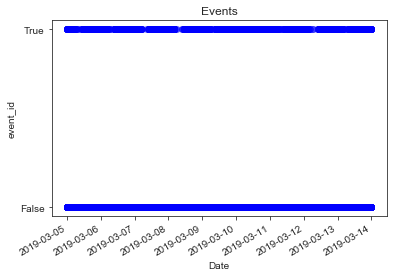

In [126]:

#MALISIMO; pero por ahis irve para plotear algo

import matplotlib.pyplot as plt

plt.plot_date(events['date'], events['attributed'], fmt="bo", tz=None, xdate=True, alpha=0.3)
#plt.scatter(clicks['created'], alpha=0.5)
plt.gcf().autofmt_xdate() #etiquetas giradas
plt.title('Events')
plt.xlabel('Date')
plt.ylabel('event_id')
plt.show()

## 3. Conclusiones

Los análisis aquí detallados permiten realizar un estudio del flujo de trabajo de la empresa Jammp en relación a cuatro datasets de Uruguay durante los días XXXX.
Breve descripcion de todo lo que fuimos viendo en cada dataset